## Parte 1: Scaricamento dei dati e visualizzazione dei grafici

## Analisi statistica dei rendimenti

FB:
                  High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2012-05-18  45.000000  38.000000  42.049999  38.230000  573576400  38.230000
2012-05-21  36.660000  33.000000  36.529999  34.029999  168192700  34.029999
2012-05-22  33.590000  30.940001  32.610001  31.000000  101786600  31.000000
2012-05-23  32.500000  31.360001  31.370001  32.000000   73600000  32.000000
2012-05-24  33.209999  31.770000  32.950001  33.029999   50237200  33.029999 

GOOGL:
                   High         Low        Open       Close     Volume  \
Date                                                                    
2011-11-30  300.055054  296.341339  299.274261  299.994995  6787206.0   
2011-12-01  308.308319  299.799805  300.300293  307.192200  7233959.0   
2011-12-02  312.312317  308.438446  308.833832  310.490479  8163229.0   
2011-12-05  316.266266  311.511505  314.134125  313.138153  6388605.0   
2011-12-

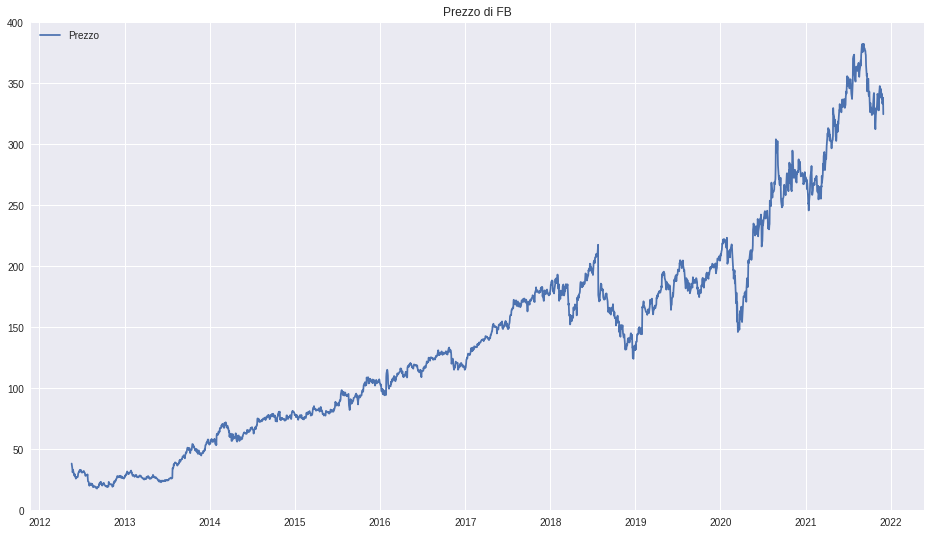

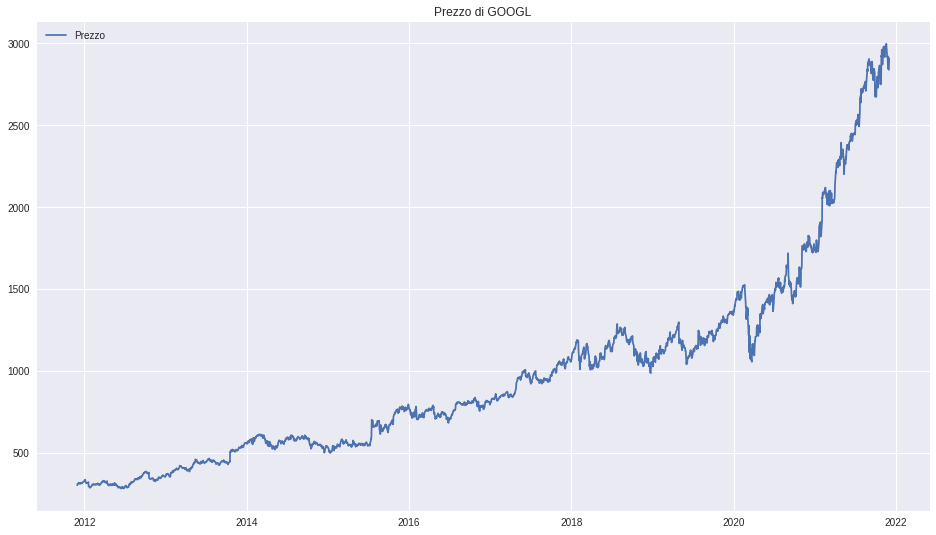

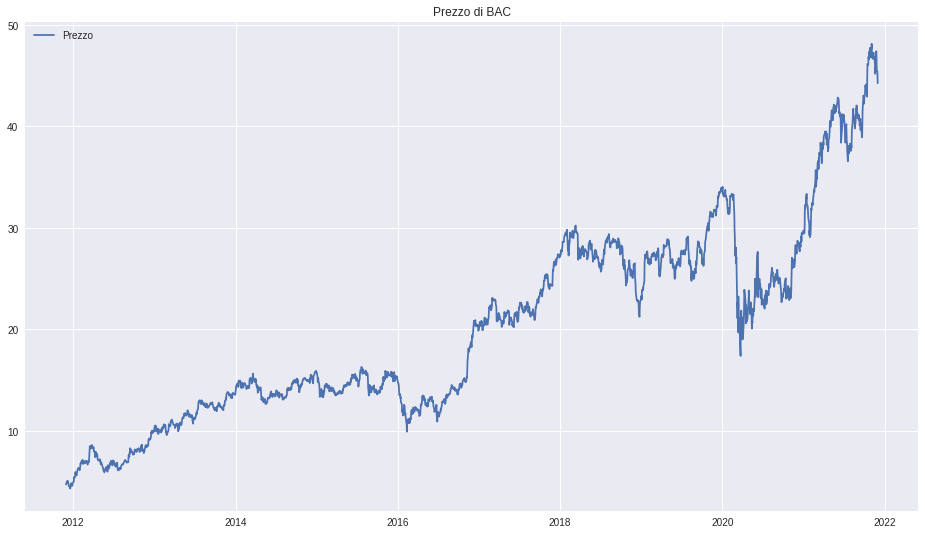

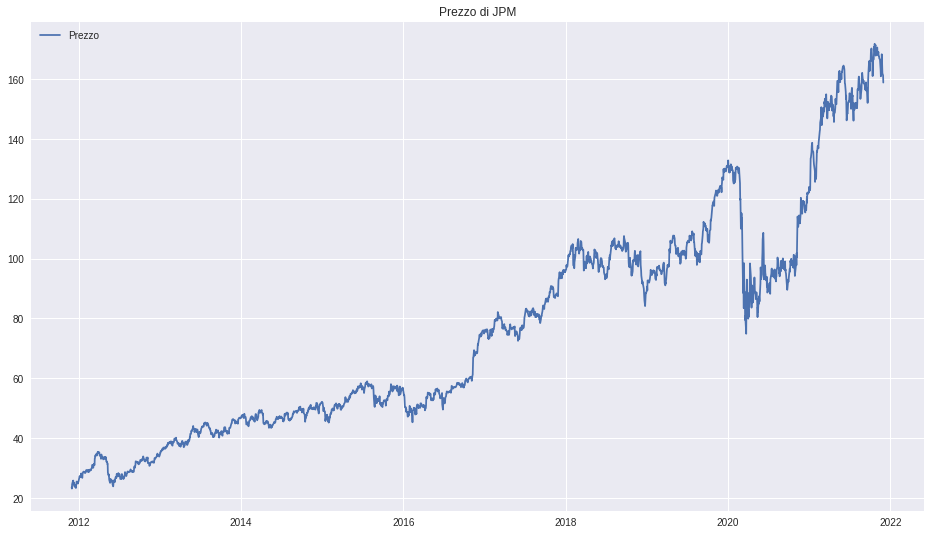

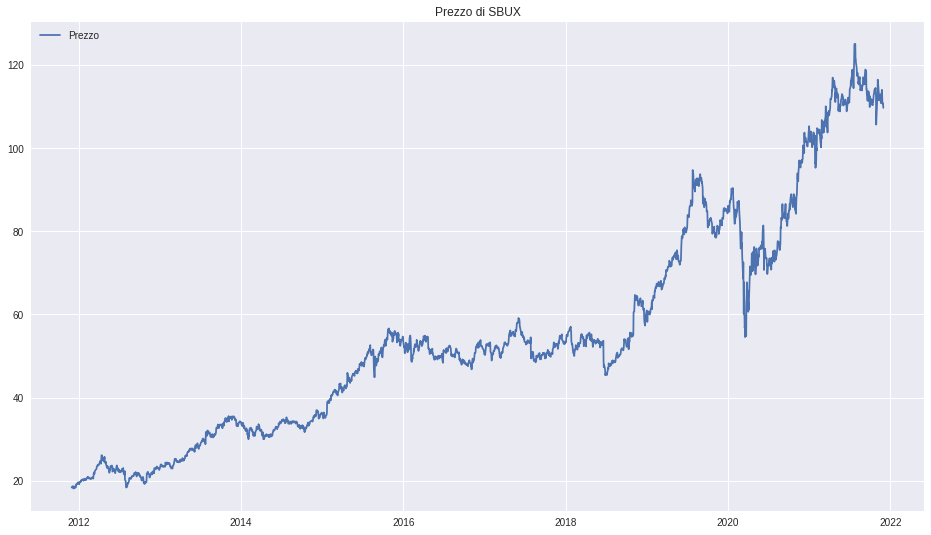

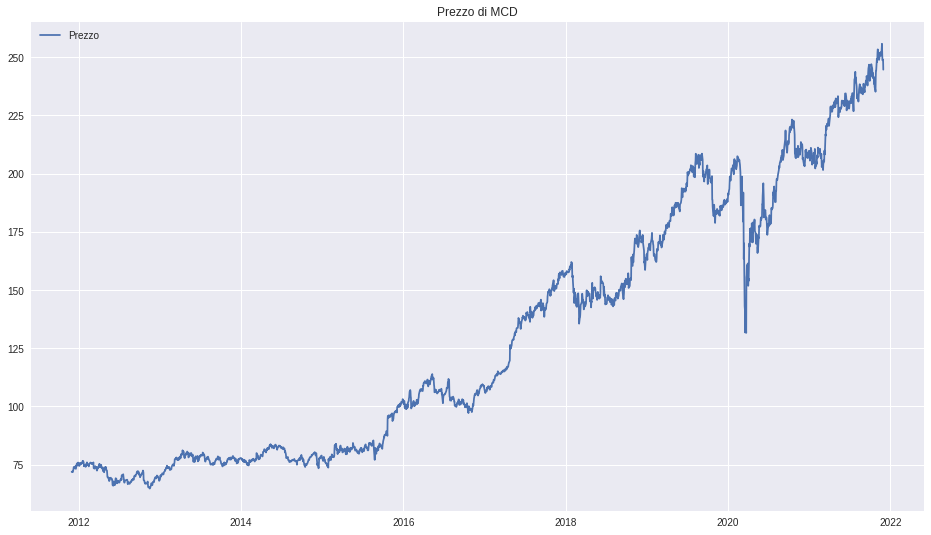

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as web
plt.style.use('seaborn')

start_date = '2011-11-30'
end_date = '2021-11-30'

tickers = ['FB', 'GOOGL', 'BAC', 'JPM', 'SBUX', 'MCD']

datasets = {}
adj_close_df = {}

for ticker in tickers:
    datasets[ticker] = web.get_data_yahoo(ticker, start_date, end_date)
    adj_close_df[ticker] = datasets[ticker]['Adj Close']
    plt.figure(figsize=(16, 9))
    plt.title('Prezzo di ' + ticker)
    plt.grid(True)
    plt.plot(datasets[ticker]['Adj Close'], label = 'Prezzo')
    plt.legend()
    print(ticker + ':\n', datasets[ticker].head(), '\n')

adj_close_df = pd.DataFrame(adj_close_df)

===STATISTICHE UNIVARIATE===

GOOGL:
Media: 0.0010187274815106322
Varianza: 0.0003
Deviazione Stamdard: 0.015865244541315767
Asimmetria: 0.5016007699161901
Curtosi: 11.218451681920437

AMZN:
Media: 0.0013353782070960783
Varianza: 0.0004
Deviazione Stamdard: 0.019073662204878467
Asimmetria: 0.5360097574189885
Curtosi: 8.05155889760218

PFE:
Media: 0.0006391326753355021
Varianza: 0.0002
Deviazione Stamdard: 0.012818145198920024
Asimmetria: 0.3441837660713046
Curtosi: 7.71916535263172

GS:
Media: 0.0007651904549887154
Varianza: 0.0003
Deviazione Stamdard: 0.017642621497368827
Asimmetria: 0.1385001297316433
Curtosi: 10.28368256293455

JPM:
Media: 0.0009034739006509357
Varianza: 0.0003
Deviazione Stamdard: 0.01697751534871998
Asimmetria: 0.2804662295331949
Curtosi: 14.256916890745119

NFLX:
Media: 0.0021279906186320876
Varianza: 0.0009
Deviazione Stamdard: 0.030063628475125722
Asimmetria: 1.705927999292591
Curtosi: 24.518737441763413

             GOOGL         AMZN          PFE           G

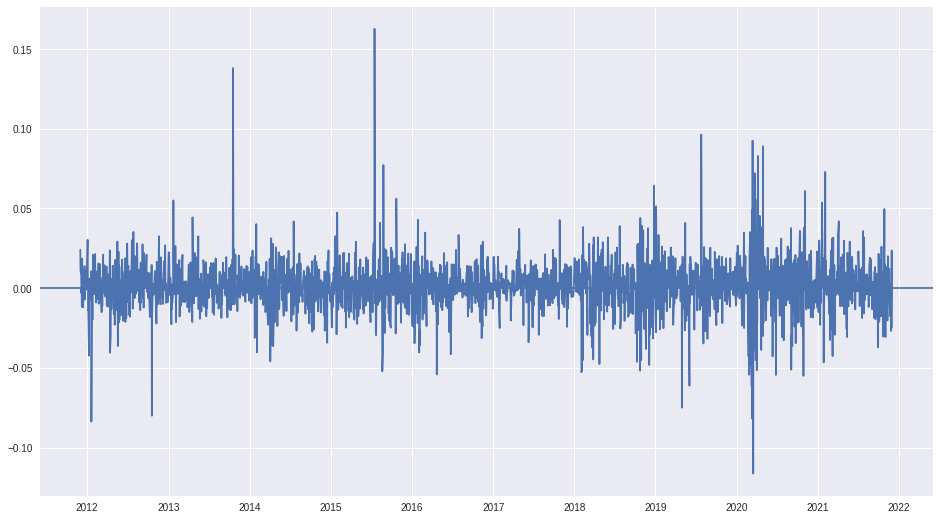

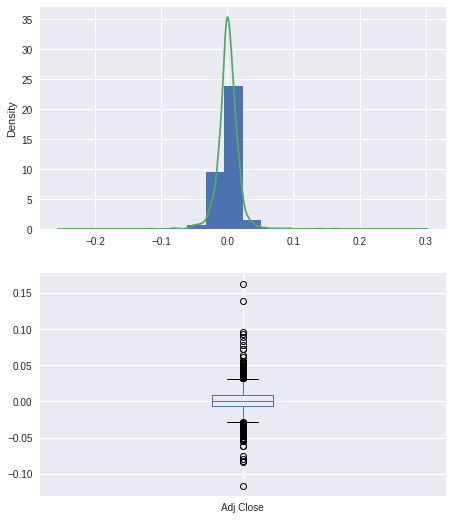

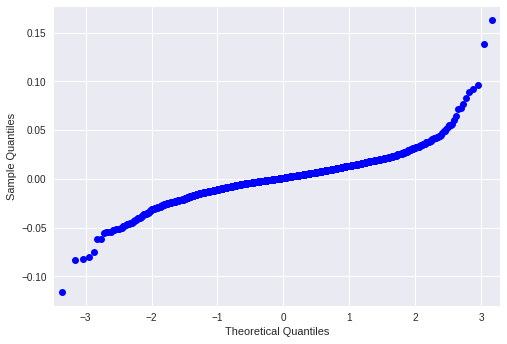

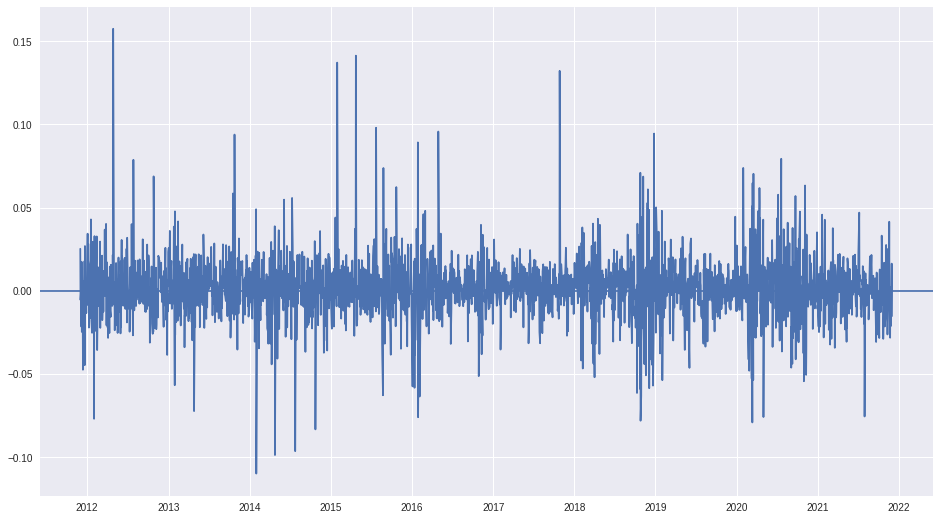

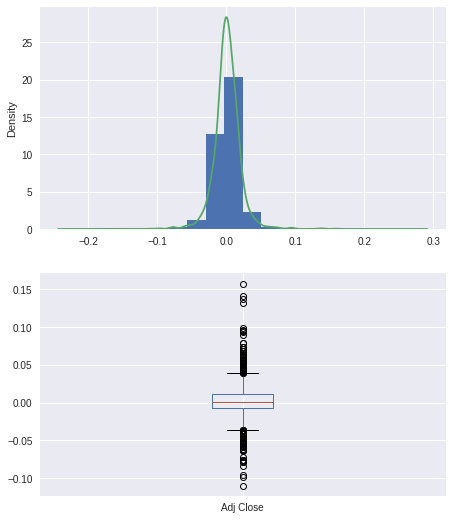

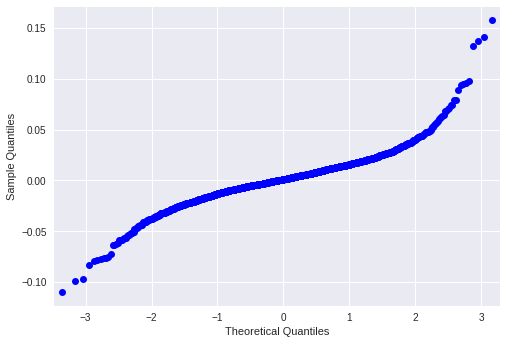

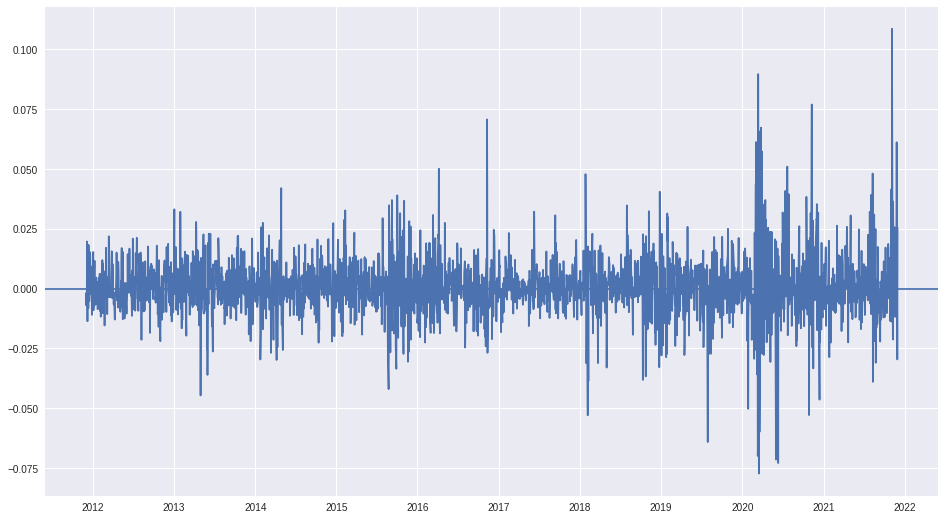

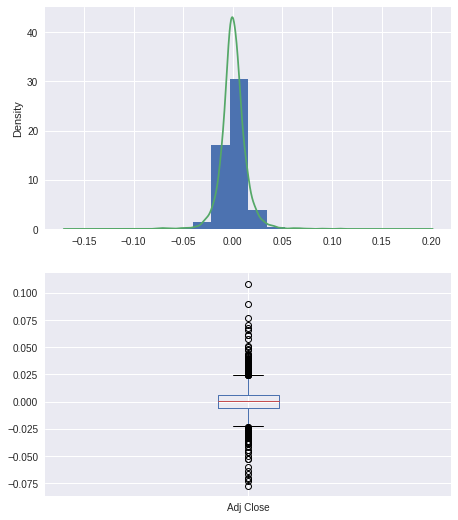

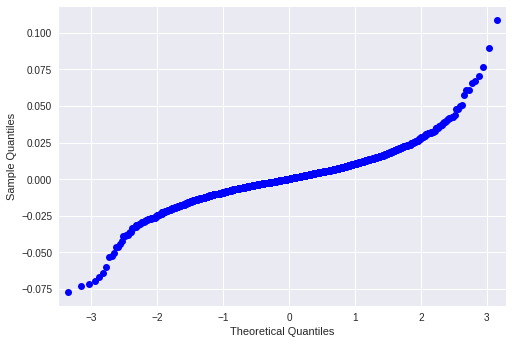

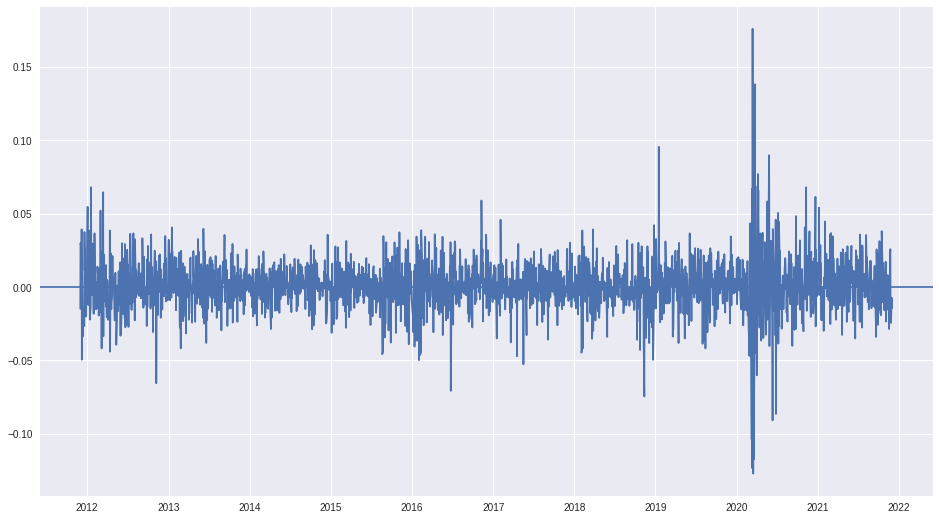

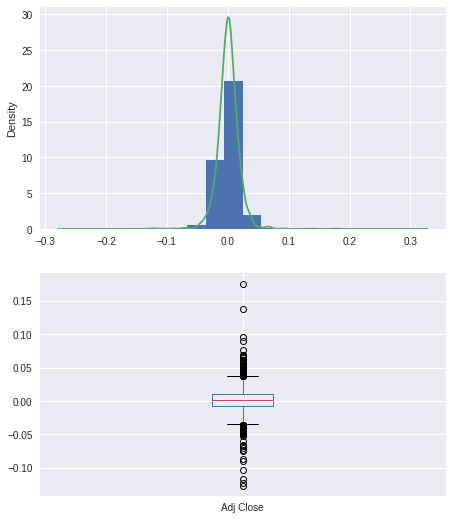

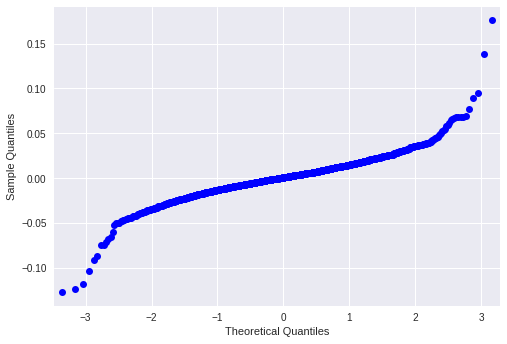

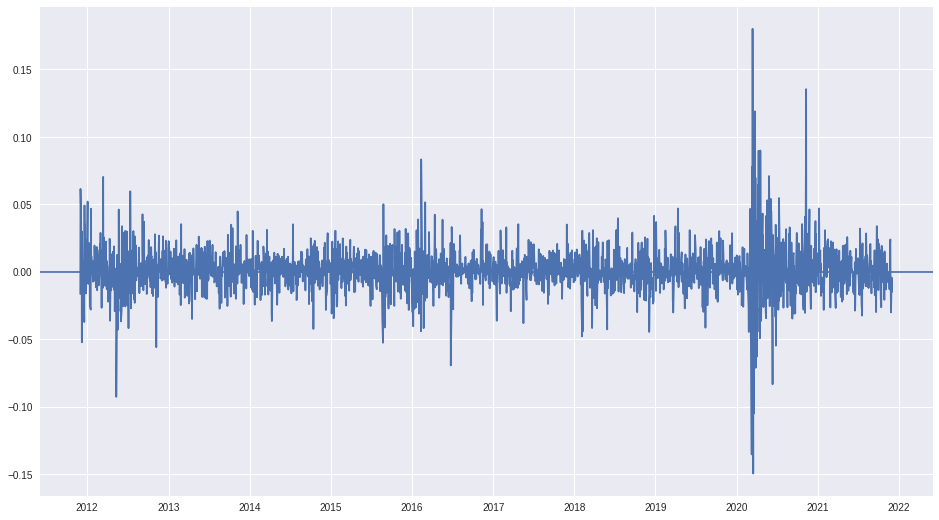

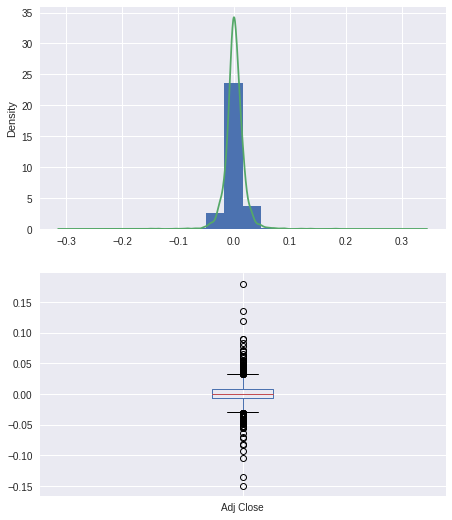

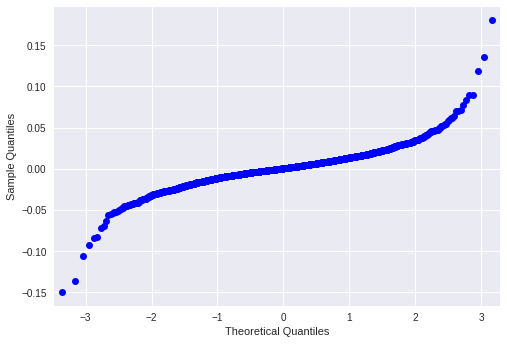

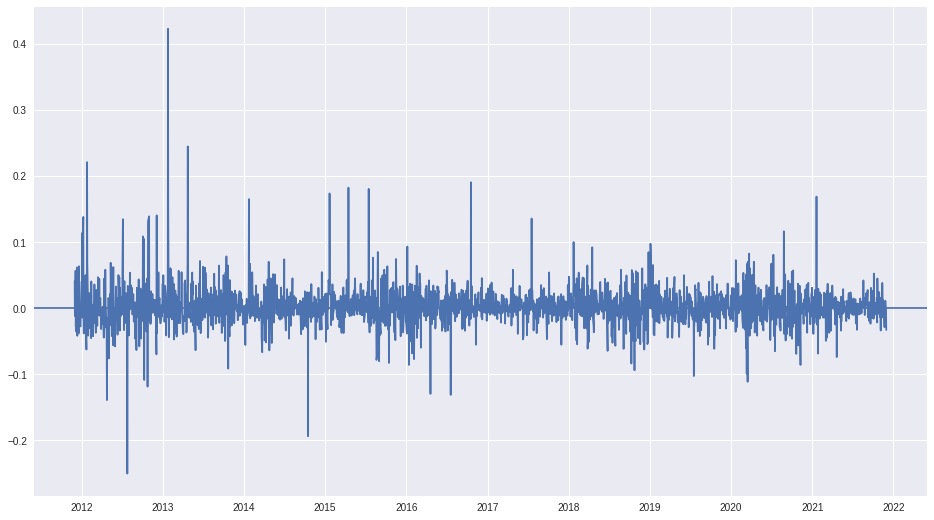

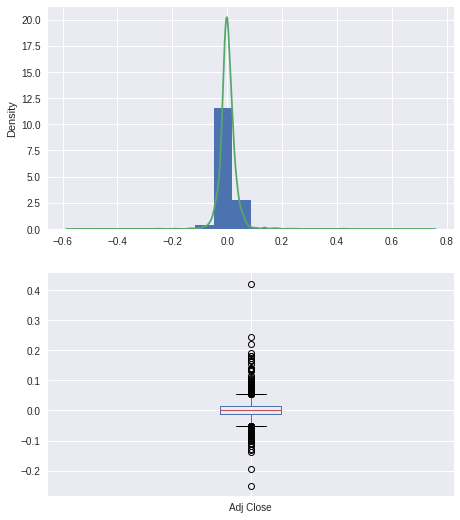

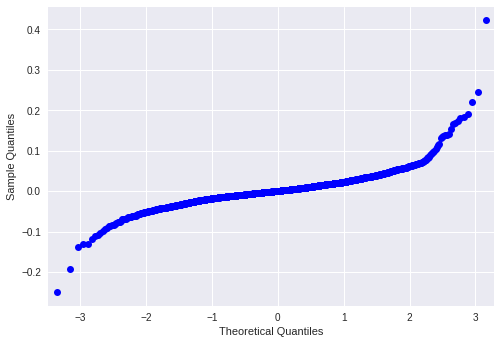

In [74]:
import numpy as np
import statsmodels.api as sm
from scipy.stats import norm

returns = {}
compounded_returns = {}

for ticker in tickers:
    returns[ticker] = datasets[ticker]['Adj Close'] / datasets[ticker]['Adj Close'].shift(1)
    compounded_returns[ticker] = returns[ticker].cumprod()
    plt.figure(figsize=(16, 9))
    returns[ticker] = returns[ticker] - 1
    plt.plot(returns[ticker])
    plt.axhline(0)
    #plt.plot(compounded_returns[ticker])
    plt.figure(figsize=(16, 9))
    plt.subplot(221)
    plt.hist(returns[ticker], density=True)
    returns[ticker].plot.density()
    plt.subplot(223)
    returns[ticker].to_frame().boxplot()
    sm.qqplot(returns[ticker])

returns = pd.DataFrame(returns)
print('===STATISTICHE UNIVARIATE===\n')
for ticker in tickers:
    print(ticker + ':')
    print('Media: ' + str(returns[ticker].mean()))
    std = returns[ticker].std()
    var = returns[ticker].var()
    print('Varianza: ' + str(np.round(std ** 2, 4)))
    print('Deviazione Stamdard: ' + str(std))
    print('Asimmetria: ' + str(returns[ticker].skew()))
    print('Curtosi: ' + str(returns[ticker].kurtosis()) + '\n')


print(returns.describe())
print(np.round(returns.cov(), 4))
print(np.round(returns.corr(), 4))

## Previsione con rete neurale

Epoch 1/15
114/114 [==============================] - 1s 4ms/step - loss: 2805.1689 - mape: 44.6323
Epoch 2/15
114/114 [==============================] - 0s 3ms/step - loss: 188.8332 - mape: 12.9347
Epoch 3/15
114/114 [==============================] - 0s 4ms/step - loss: 178.5777 - mape: 12.6376
Epoch 4/15
114/114 [==============================] - 0s 4ms/step - loss: 177.9242 - mape: 12.6104
Epoch 5/15
114/114 [==============================] - 0s 4ms/step - loss: 177.1461 - mape: 12.5805
Epoch 6/15
114/114 [==============================] - 0s 4ms/step - loss: 176.2731 - mape: 12.5443
Epoch 7/15
114/114 [==============================] - 0s 4ms/step - loss: 175.2280 - mape: 12.5025
Epoch 8/15
114/114 [==============================] - 0s 4ms/step - loss: 174.1462 - mape: 12.4580
Epoch 9/15
114/114 [==============================] - 0s 3ms/step - loss: 173.3037 - mape: 12.4314
Epoch 10/15
114/114 [==============================] - 0s 4ms/step - loss: 171.7717 - mape: 12.3635
Epoch 11

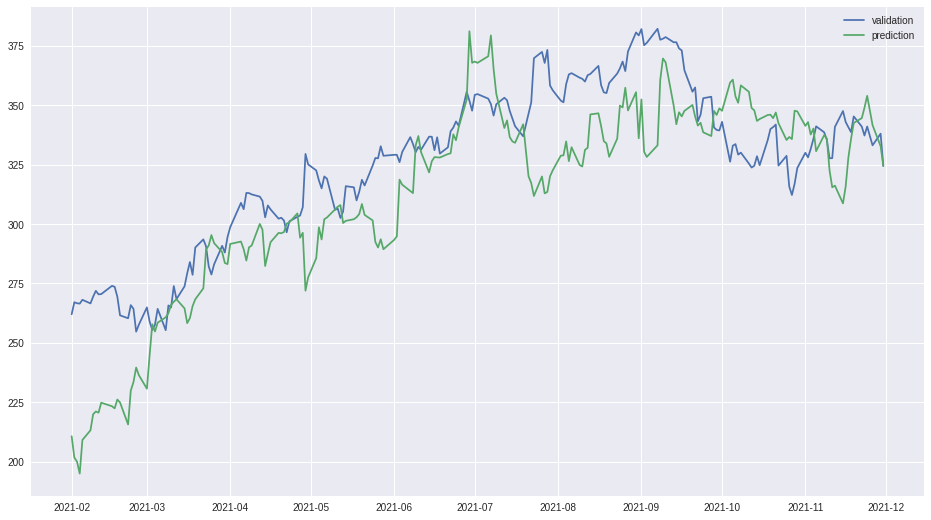

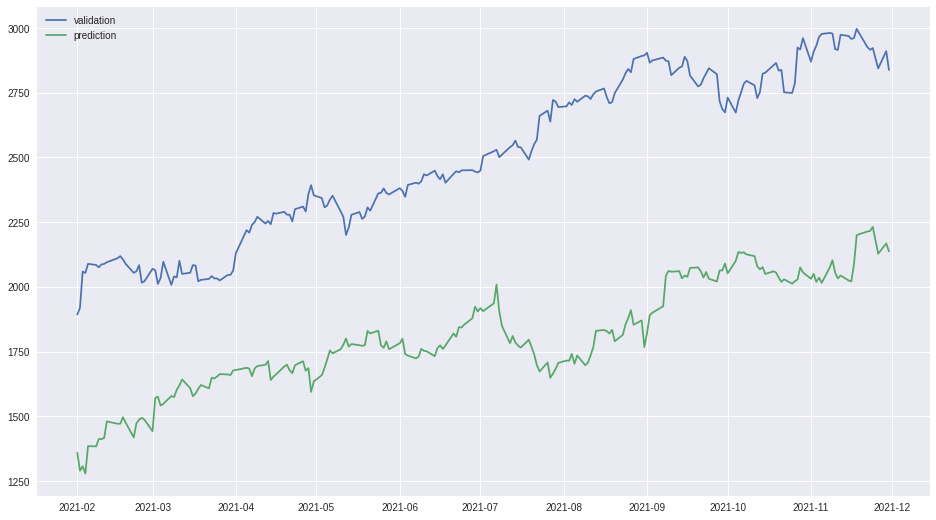

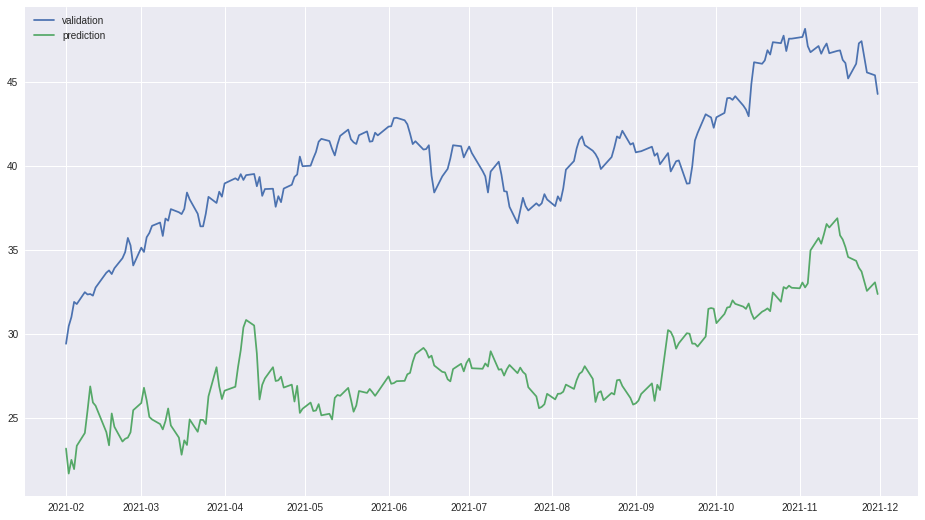

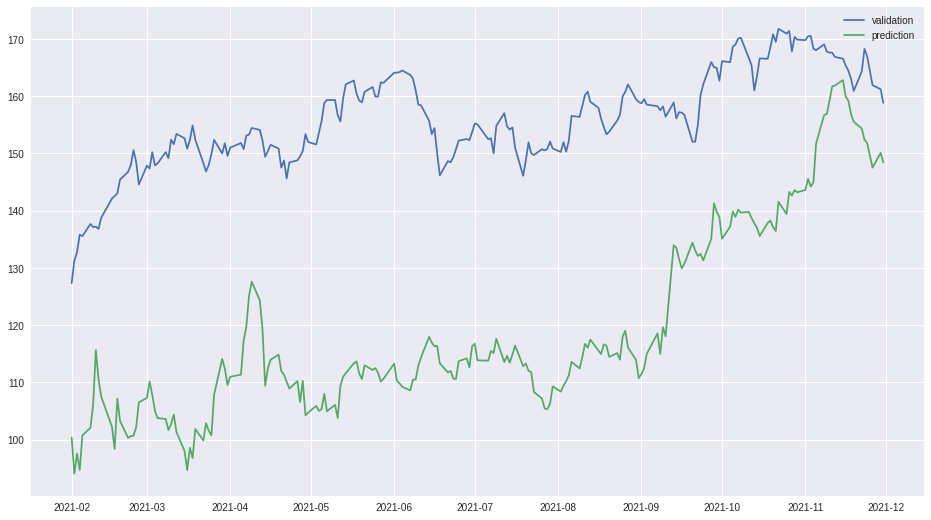

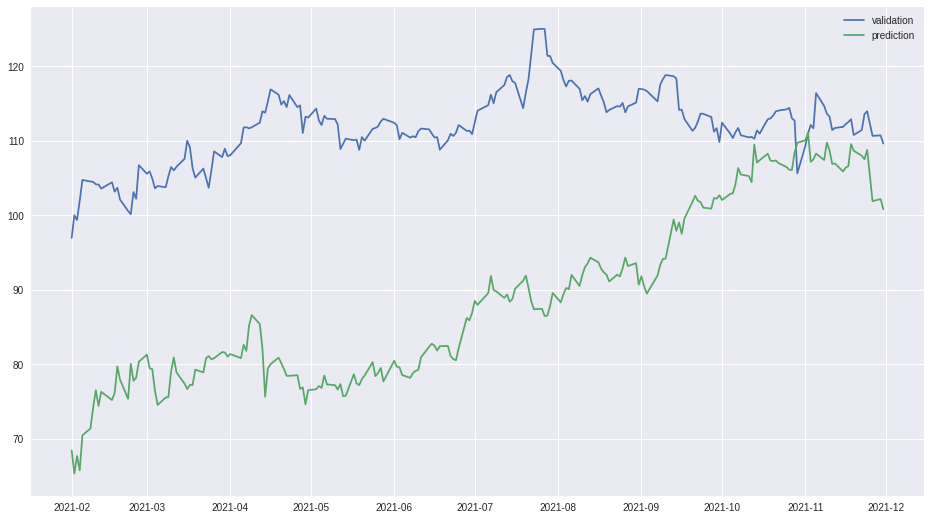

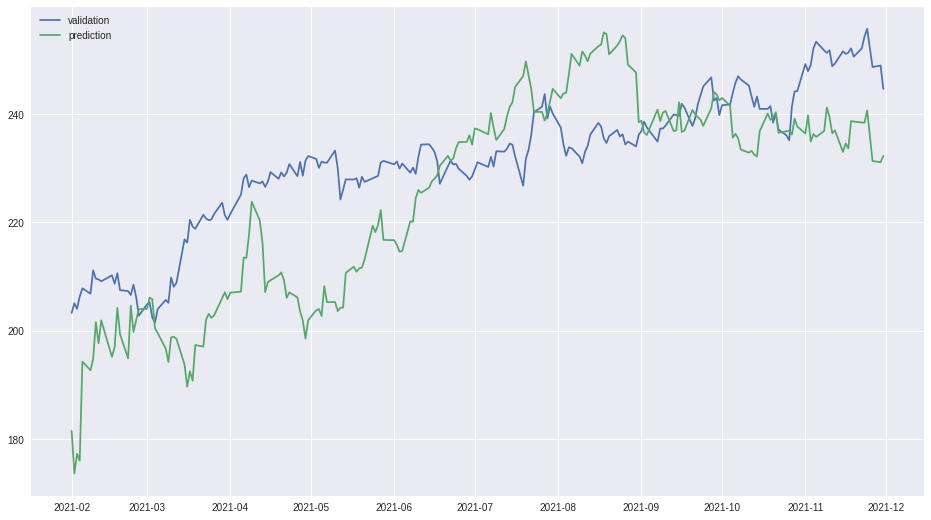

In [23]:
from tensorflow import keras
import sklearn.preprocessing as pre
import tensorflow as tf

val = datasets[tickers[0]].loc['2021-01-31' : '2021-11-30']
#divido i dati in 80 mesi di training, 30 di test, 10 validazione. faccio le proporzioni
predicted = pd.DataFrame(index = adj_close_df.index[adj_close_df.shape[0] - val.shape[0]:])
for ticker in tickers:
    data = datasets[ticker]['Adj Close']
    train = np.array(data.loc[start_date : '2018-07-30'])
    test = np.array(data.loc['2018-07-31':'2021-01-30'])
    validation = data.loc['2021-01-31':'2021-11-30']

    window_size = output_size = validation.shape[0]

    best_model = None
    best_scaler = None
    best_scaled_data = None
    best_performance = None

    for i in range(10, 11):
        sc = pre.MinMaxScaler(feature_range=(0, i))
        sc = pre.FunctionTransformer(func=(lambda x: x), inverse_func=(lambda x: x))
        s_data = sc.fit_transform(np.asarray(data).reshape(-1, 1))

        train_inputs = np.asarray([s_data[i:i+window_size] for i in range(0, train.shape[0] - output_size - window_size)]).reshape((train.shape[0] - window_size - output_size, window_size, 1))
        train_outputs = np.asarray([s_data[i + window_size:i + window_size + output_size] for i in range(0, train_inputs.shape[0])]).reshape((train_inputs.shape[0], output_size, 1))

        test_inputs = np.asarray([s_data[i:i+window_size] for i in range(train.shape[0], train.shape[0] + test.shape[0] - output_size - window_size)]).reshape((test.shape[0] - window_size - output_size, window_size, 1))
        test_outputs = np.asarray([s_data[i + window_size : i + window_size + output_size] for i in range(train.shape[0], train.shape[0] + test_inputs.shape[0])]).reshape((test_inputs.shape[0], output_size, 1))

        model = keras.Sequential([
            keras.layers.Dense(50, activation = 'relu'),
            keras.layers.Dense(1)
        ])

        model.compile(
            optimizer = keras.optimizers.Adam(),
            loss='mse',
            metrics = ['mape']
        )

        model.fit(train_inputs, train_outputs, epochs = i + 5, batch_size=i)

        performance = model.evaluate(test_inputs, test_outputs)
        print(performance)

        if best_performance is None or performance[1] < best_performance[1]:
            best_model = model
            best_scaler = sc
            best_scaled_data = s_data
            best_performance = performance

    predictions = pd.DataFrame(best_scaler.inverse_transform(best_model.predict(np.asarray(best_scaled_data[data.shape[0] - validation.shape[0] - window_size : data.shape[0] - validation.shape[0]]).reshape(1, window_size, 1))[0]).reshape(output_size), index=adj_close_df.index[adj_close_df.shape[0] - output_size:])


    predicted[ticker] = predictions

    plt.figure(figsize=(16, 9))
    plt.plot(validation, label = 'validation')
    plt.plot(predictions, label = 'prediction')
    plt.legend()

In [4]:

predictions

,0
Date,
2021-02-01,521.259277
2021-02-02,505.482361
2021-02-03,513.771484
2021-02-04,502.277252
2021-02-05,527.420776
...,...
2021-11-23,771.698975
2021-11-24,778.813782
2021-11-26,725.418457


### Alternativa con ARIMA (Scarsa)

In [ ]:
from pmdarima import auto_arima

arima_model = auto_arima(np.concatenate([np.asarray(train).reshape(len(train)), np.asarray(test).reshape(len(test))]), start_p = 0, start_q = 0, max_p = 5, max_q = 5, max_d = 5, start_P=0, start_Q=0, start_D = 1, n_fits=100, seasonal = True, m = 12)
arima_model
plt.figure(figsize=(16, 9))
plt.plot(arima_model.predict(n_periods=validation.shape[0]))
plt.plot(np.asarray(validation))


## Capital Asset Pricing Model

In [51]:
## Scarico i dati di S&P 500
import pandas_datareader as web

betas = {}
sp500 = web.get_data_yahoo('^GSPC', start_date, end_date)
adj_close_df['Benchmark'] = sp500['Adj Close']

cov_mat = adj_close_df.resample('M').last().pct_change().dropna().cov()

for ticker in tickers:
    betas[ticker] = cov_mat[ticker]['Benchmark'] / cov_mat['Benchmark']['Benchmark']

print(betas)

#Fama-French
#Ottengo il dataframe pulito
factors = pd.read_csv('F-F_Research_Data_Factors.CSV', skiprows = 3)
factors = factors[factors.index < factors[factors.iloc[:, 0] == " Annual Factors: January-December "].index[0]]
factors.columns = ['Date', 'MKT', 'SMB', 'HML', 'RF']
factors['Date'] = pd.to_datetime(factors['Date'], format = '%Y%m').dt.strftime('%Y-%m')
factors = factors.set_index('Date')
factors = factors[start_date : end_date]

print(factors)

{'GOOGL': 1.0133211463991598, 'AMZN': 1.2221364180277146, 'PFE': 0.7559657449532845, 'GS': 1.5363367493697877, 'JPM': 1.2645108533132796, 'NFLX': 1.0919487385433977}
              MKT       SMB       HML        RF
Date                                           
2011-12      0.74     -0.60      1.61      0.00
2012-01      5.05      2.06     -0.94      0.00
2012-02      4.42     -1.86      0.43      0.00
2012-03      3.11     -0.66      1.12      0.00
2012-04     -0.85     -0.41     -0.77      0.00
...           ...       ...       ...       ...
2021-06      2.75      1.80     -7.76      0.00
2021-07      1.27     -3.96     -1.75      0.00
2021-08      2.90     -0.48     -0.13      0.00
2021-09     -4.37      0.80      5.09      0.00
2021-10      6.65     -2.28     -0.45      0.00

[119 rows x 4 columns]


In [52]:
import statsmodels.formula.api as smf

y = adj_close_df[tickers[0]].resample('M').last().pct_change().dropna()
y.index = y.index.strftime('%Y-%m')
y.name = 'RTN'

ff_data = factors.join(y)
for col in ff_data.columns:
    ff_data[col] = ff_data[col].astype('float')

ff_data['excess'] = ff_data['RTN'] - ff_data['RF']

print(ff_data)
ff_model = smf.ols(formula='excess ~ MKT + SMB + HML', data=ff_data).fit()
print(ff_model.summary())

          MKT   SMB   HML   RF       RTN    excess
Date                                              
2011-12  0.74 -0.60  1.61  0.0  0.077596  0.077596
2012-01  5.05  2.06 -0.94  0.0 -0.101858 -0.101858
2012-02  4.42 -1.86  0.43  0.0  0.065746  0.065746
2012-03  3.11 -0.66  1.12  0.0  0.037186  0.037186
2012-04 -0.85 -0.41 -0.77  0.0 -0.056749 -0.056749
...       ...   ...   ...  ...       ...       ...
2021-06  2.75  1.80 -7.76  0.0  0.036040  0.036040
2021-07  1.27 -3.96 -1.75  0.0  0.103506  0.103506
2021-08  2.90 -0.48 -0.13  0.0  0.074009  0.074009
2021-09 -4.37  0.80  5.09  0.0 -0.076169 -0.076169
2021-10  6.65 -2.28 -0.45  0.0  0.107499  0.107499

[119 rows x 6 columns]
                            OLS Regression Results                            
Dep. Variable:                 excess   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     12.

## Strategia di trading con backtesting

In [53]:
for ticker in tickers:
    print(ticker)
    datasets[ticker]['SMA20'] = datasets[ticker]['Adj Close'].rolling(20).mean()
    datasets[ticker]['SMA120'] = datasets[ticker]['Adj Close'].rolling(120).mean()
    datasets[ticker]['SMA252'] = datasets[ticker]['Adj Close'].rolling(252).mean()
    datasets[ticker]['EWM12'] = datasets[ticker]['Adj Close'].ewm(span = 12, adjust = False).mean()
    datasets[ticker]['EWM26'] = datasets[ticker]['Adj Close'].ewm(span = 26, adjust = False).mean()

    #plt.figure(figsize=(16, 9))
    #pl1 = plt.subplot2grid((2, 1), (0, 0), colspan = 1, title = ticker)
    #pl2 = plt.subplot2grid((6, 1), (5, 0), colspan = 1, sharex = pl1)
    #pl1.plot(datasets[ticker]['Adj Close'])
    #pl1.plot(datasets[ticker]['SMA120'])
    #pl1.plot(datasets[ticker]['SMA20'])
    #pl1.plot(datasets[ticker]['SMA252'])
    #pl1.plot(datasets[ticker]['EWM120'], label = 'EWM120')
    #pl1.plot(datasets[ticker]['EWM26'])
    #pl2.bar(datasets[ticker].index, datasets[ticker]['Volume'])
    #pl1.legend()

    #creo la strategia di tradind e calcolo il rendimento
    datasets[ticker]['Previous'] = datasets[ticker]['Adj Close'].shift(1)

    datasets[ticker]['Invested_SMA'] = [1 if datasets[ticker].loc[i, 'SMA20'] > datasets[ticker].loc[i, 'SMA120']
                                    else 0 for i in datasets[ticker].index]
    datasets[ticker]['Invested_EWM'] = [1 if datasets[ticker].loc[i, 'EWM12'] > datasets[ticker].loc[i, 'EWM26']
                                        else 0 for i in data.index]

    datasets[ticker]['Change'] = datasets[ticker]['Adj Close'] / datasets[ticker]['Previous']
    #print(datasets[ticker])

    sma_returns = np.cumprod(datasets[ticker]['Change'][datasets[ticker]['Invested_SMA'] == 1])
    ewm_returns = np.cumprod(datasets[ticker]['Change'][datasets[ticker]['Invested_EWM'] == 1])
    buy_and_hold = np.cumprod(datasets[ticker]['Change'])

    print(sma_returns, buy_and_hold, ewm_returns)

GOOGL
Date
2012-08-06    1.002323
2012-08-07    0.998768
2012-08-08    1.001403
2012-08-09    1.001590
2012-08-10    1.001045
                ...   
2021-11-23    4.353704
2021-11-24    4.363799
2021-11-26    4.246222
2021-11-29    4.346194
2021-11-30    4.237696
Name: Change, Length: 1905, dtype: float64 Date
2011-11-30         NaN
2011-12-01    1.023991
2011-12-02    1.034986
2011-12-05    1.043811
2011-12-06    1.040675
                ...   
2021-11-23    9.718962
2021-11-24    9.741496
2021-11-26    9.479025
2021-11-29    9.702196
2021-11-30    9.459991
Name: Change, Length: 2517, dtype: float64 Date
2011-12-01     1.023991
2011-12-02     1.034986
2011-12-05     1.043811
2011-12-06     1.040675
2011-12-07     1.040041
                ...    
2021-11-23    10.849145
2021-11-24    10.874300
2021-11-26    10.581307
2021-11-29    10.830430
2021-11-30    10.560060
Name: Change, Length: 1736, dtype: float64
AMZN
Date
2012-05-22    0.987254
2012-05-23    0.996195
2012-05-24    0.986842
2

## Ottimizzazione di portafoglio


In [24]:
import numpy as np
import scipy.optimize as sco
for p in predicted:
    predicted[p] = np.asarray(predicted[p]).reshape(predicted[p].shape[0])

predicted
expected_returns = {}

data = adj_close_df['2019-11-30':'2020-12-01'].resample('M').last().pct_change().dropna()

def volatility(w, rets, mat):
    return np.sqrt(np.dot(w.T, np.dot(mat, w)))

def frontiera_efficiente_analitico(ritorni, cov_mat, range_ritorni):
    portafogli_efficienti = []
    bounds = tuple((0, 1) for i in range(len(ritorni)))
    initial_guess = len(ritorni) * [1 / len(ritorni),]

    for ret in range_ritorni:
        constraints = ({'type': 'eq', 'fun': lambda x: np.sum(ritorni * x) - ret},
                      {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

        efficient_portfolio = sco.minimize(volatility,
                                           x0 = initial_guess,
                                           args= (ritorni, cov_mat), method='SLSQP',
                                           constraints=constraints,
                                           bounds=bounds)

        portafogli_efficienti.append(efficient_portfolio.x)
    return portafogli_efficienti

## calcolo i ritorni attesi dal mese 109 in avanti basandomi sul forecasting

expected_returns = pd.DataFrame()
for ticker in tickers:
    expected_returns[ticker] = np.asarray(predicted[ticker]).reshape(predicted[ticker].shape[0])

expected_returns.index = datasets[tickers[0]].index[datasets[tickers[0]].shape[0] - expected_returns.shape[0]:]
expected_returns = expected_returns.resample('M').last().pct_change().dropna()

predicted_df = pd.DataFrame(predicted)

p_returns = expected_returns.mean() * 12
r_returns = data.mean() * 12

frontiera_previsioni = frontiera_efficiente_analitico(p_returns, expected_returns.cov() * 12, np.linspace(0, 3, 200))
frontiera_passati = frontiera_efficiente_analitico(r_returns, data.cov() * 12, np.linspace(-0.1, 3, 200))



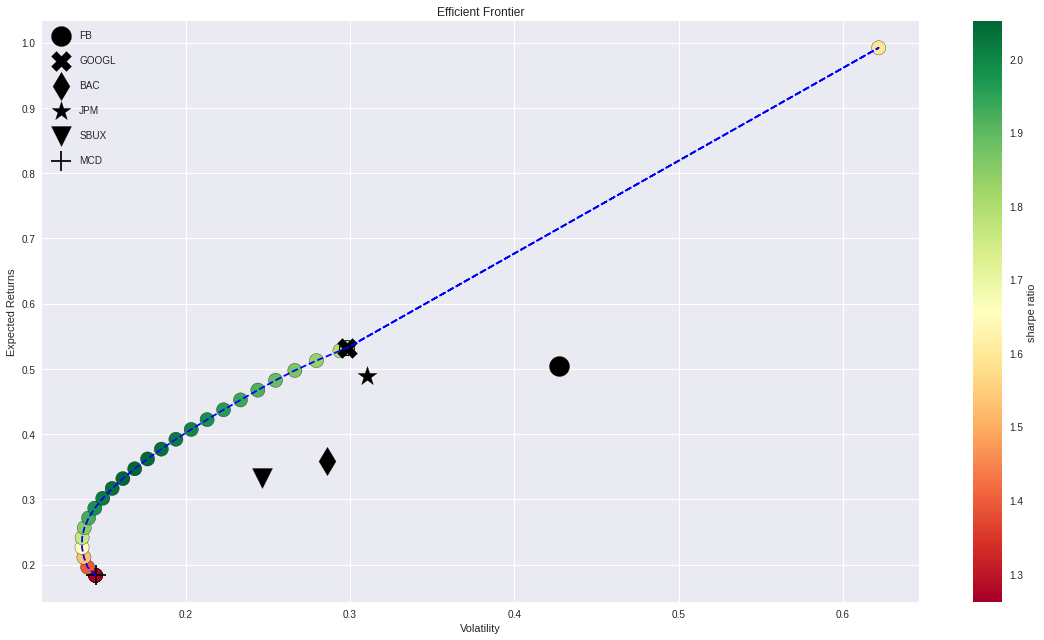

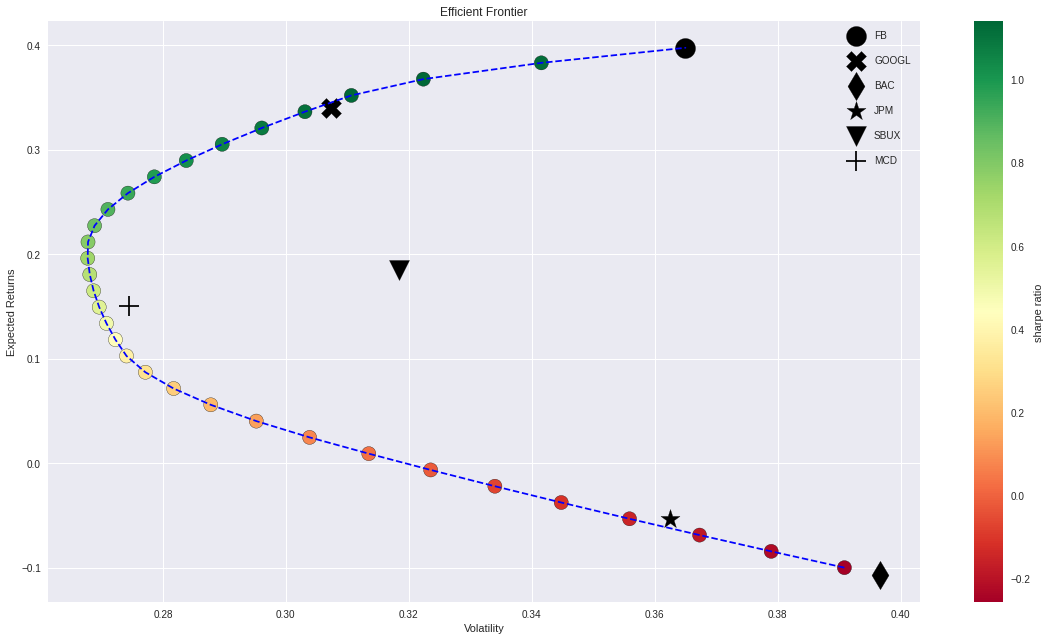

In [27]:
def get_portfolio_results(frontier, exp_rets, return_list):
    weights = []
    rets = []
    volatilities = []
    sr = []

    for p in frontier:
        ret = np.sum(p * return_list)
        vol = np.sqrt(np.dot(p.T, np.dot(exp_rets.cov() * 12, p)))
        s_r = ret / vol
        rets.append(ret)
        weights.append(p)
        volatilities.append(vol)
        sr.append(s_r)

    result = pd.DataFrame({'returns' : rets, 'volatility': volatilities, 'sharpe ratio': sr})
    return result


def plot_frontier(result, tickers, ret_list, expected_returns):
    MARKS = ['o', 'X', 'd', '*', 'v', '+']

    fig, ax = plt.subplots(figsize = (16, 9))
    result.plot(kind='scatter', x='volatility', s = 200,
                          y='returns', c='sharpe ratio',
                          cmap='RdYlGn', edgecolors='black',
                          ax=ax)
    ax.set(xlabel='Volatility',
           ylabel='Expected Returns',
           title='Efficient Frontier')
    ax.plot(result['volatility'], result['returns'], 'b--')

    for asset_index in range(6):
        ax.scatter(x=np.sqrt((ret_list.cov() * 12).iloc[asset_index, asset_index]),
                   y=expected_returns[asset_index],
                   marker=MARKS[asset_index],
                   s=400,
                   color='black',
                   label=tickers[asset_index],
                   )
    ax.legend(labelspacing = 1.5)

    plt.tight_layout()
    plt.show()

a = get_portfolio_results(frontiera_previsioni, expected_returns, p_returns)
b = get_portfolio_results(frontiera_passati, data, r_returns)

plot_frontier(a, tickers, expected_returns, p_returns)
plot_frontier(b, tickers, data, r_returns)

In [26]:
# Cerco i portafogli che massimizzano lo Sharpe Ratio


def sharpe_ratio(w, ritorni, m, risk_free):
    portf_returns = np.sum(ritorni * w)
    portf_volatility = np.sqrt(np.dot(w.T, np.dot(m, w)))
    return (portf_returns - risk_free) / portf_volatility


best_expected_portfolio = best_expected_sharpe_ratio = best_past_portfolio = best_past_sharpe_ratio = None

for w in frontiera_previsioni:
    w_sharpe_ratio = sharpe_ratio(w, p_returns, expected_returns.cov() * 12, 0)
    if best_expected_sharpe_ratio is None or w_sharpe_ratio > best_expected_sharpe_ratio:
        best_expected_sharpe_ratio = np.round(w_sharpe_ratio, 3)
        best_expected_portfolio = w

for w in frontiera_passati:
    w_sharpe_ratio = sharpe_ratio(w, r_returns, data.cov() * 12, 0)
    if best_past_sharpe_ratio is None or w_sharpe_ratio > best_past_sharpe_ratio:
        best_past_sharpe_ratio = np.round(w_sharpe_ratio, 3)
        best_past_portfolio = w


print(best_past_sharpe_ratio, np.round(best_past_portfolio, 3))
print(best_expected_sharpe_ratio, np.round(best_expected_portfolio, 3))

1.14 [0.475 0.525 0.    0.    0.    0.   ]
2.051 [0.    0.404 0.    0.026 0.1   0.471]


In [28]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime
import pandas as pd

start_date = '2009-9-29'
end_date = '2021-12-09'
#end_date = datetime.today()
future_days = 211
df = datasets[tickers[0]][:'2021-01-30']
df[str(future_days) + '_Day_Price_Forecast'] = df[['Close']].shift(-future_days)
X = np.array(df[['Close']])
X = X[:df.shape[0] - future_days]
y = np.array(df[str(future_days) + '_Day_Price_Forecast'])
y = y[:-future_days]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=30/110)


gamma = 0.00000001

svr_rbf_confidence = 0
svr_rbf = SVR(kernel='linear', C=1000, gamma=gamma)
svr_rbf.fit(x_train, y_train)
x_f = svr_rbf.predict(df[['Close']].iloc[df.shape[0] - future_days : df.shape[0]])
#svm_prediction = np.append(df['Close'].iloc[df.shape[0] - x_test.shape[0]: df.shape[0]], x_f)
svr_rbf_confidence = svr_rbf.score(x_test, y_test)

#minimo = svm_prediction.min()
#massimo = svm_prediction.max()

print(svr_rbf_confidence)

#full_pred = svm_prediction

<ipython-input-28-d775edb8e21a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[str(future_days) + '_Day_Price_Forecast'] = df[['Close']].shift(-future_days)


0.8433724426556841


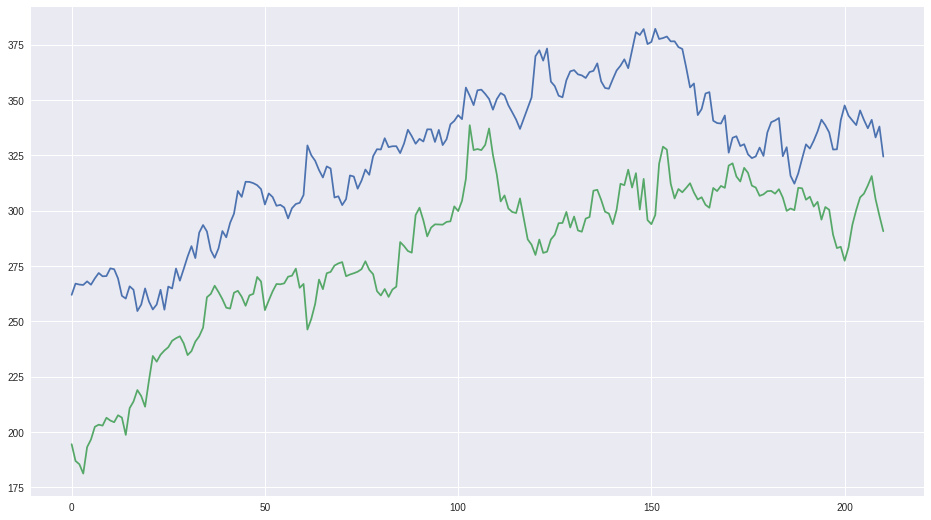

In [117]:
plt.figure(figsize=(16, 9))
plt.plot(np.asarray(datasets[tickers[0]]['Adj Close']['2021-01-31':]))
plt.plot(x_f)